<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Seminario_ML/blob/main/3_Aprendizaje_Profundo/2_Entrenamiento_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align = 'center'> Entrenamiento de una red neuronal artifical </h1>

La optimización de funciones matemáticas es fundamental en el entrenamiento de redes neuronales artificiales, ya que permite ajustar los pesos y sesgos de la red para minimizar una función de pérdida. Esta función de pérdida evalúa qué tan bien la red está realizando la tarea deseada en un conjunto de datos de entrenamiento. Utilizando algoritmos de optimización como el descenso de gradiente, la red ajusta sus parámetros en cada iteración del entrenamiento para mejorar su desempeño. La optimización busca encontrar los valores óptimos de los parámetros que minimizan la función de pérdida, lo que implica que la red se adapta mejor a los datos de entrenamiento y generaliza bien a datos no vistos. En resumen, la optimización de funciones matemáticas en el contexto de las redes neuronales artificiales es crucial para mejorar su capacidad de aprendizaje y rendimiento en diversas tareas.

En tareas de regresión, típicamente queremos resolver el problema

$$MSE = \frac{1}{N} \sum_{i = 1}^{N} \left( y_{i} - \hat{y}_{i} \right)^{2}$$

- $N$: Número de observaciones

- $y$: variable de respuesta

- $\hat{y}$: predicción de la variable de respuesta

En tareas de clasificación, la función objetivo típicamente es

$$CE = - \frac{1}{N} \sum_{i = 1}^{N} \frac{j = 1}{K} y_{ij} log(\hat{y}_{ij})$$

- $N$: Número de observaciones

- $K$: Número de clases

- $y_{ij}$: variable binaria $1$ si la observación $i$ pertenece a la clase $j$, 0 en caso contrario

- $\hat{y}_{ij}$: es la probabilidad predicha de que la observación $i$ pertenezca a la clase $j$

Para ambos casos, el vector $\mathbf{\hat{y}}$ corresponde a una función de los parámetros del modelo utilizado. En el caso de las redes neuronales artificiales, entre más capas ocultas y mayor número de neuronas más complicada es esta función y mayor número de variables tendrá. Y, dado que, usualmente definimos muchas funciones de activación no lineales, la optimización de esta función se complica y debemos contar con algoritmos eficientes para soluciones el problema de optimización.

<h2> Decenso del gradiente </h2>

El problema del descenso de gradiente es un algoritmo de optimización utilizado para encontrar el mínimo global de una función, en nuestro caso, la función de pérdida $L(\mathbf{w})$, donde $\mathbf{w})$ representa los parámetros del modelo que queremos ajustar para minimizar la pérdida. 

El descenso de gradiente se basa en la idea de iterativamente ajustar los parámetros en la dirección opuesta al gradiente de la función de pérdida. El gradiente de una función es un vector que indica la dirección en la cual la función crece más rápidamente. Por lo tanto, al moverse en la dirección opuesta al gradiente, podemos descender hacia un mínimo de la función.

El algoritmo del descenso de gradiente se define de la siguiente manera:

1. Inicializar los parámetros $\mathbf{w}$ con valores aleatorios o algún valor inicial predefinido.
2. Calcular el gradiente de la función de pérdida con respecto a los parámetros $w$: $\nabla_{\mathbf{w}} L(\mathbf{w})$
3. Actualizar los parámetros $\mathbf{w}$ en la dirección opuesta al gradiente multiplicado por una tasa de aprendizaje $\eta$: $\mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w})$.
4. Repetir los pasos 2 y 3 hasta que se cumpla un criterio de detención, como alcanzar un número máximo de iteraciones o cuando la mejora en la función de pérdida sea mínima.

Este proceso de actualización de los parámetros se repite iterativamente hasta que se alcanza la convergencia y se encuentra un mínimo local o global de la función de pérdida. La tasa de aprendizaje ($\eta$) es un hiperparámetro que controla la magnitud de los pasos que damos en cada iteración. Un valor demasiado grande puede causar oscilaciones o divergencia, mientras que un valor demasiado pequeño puede hacer que el algoritmo converja lentamente.

Matemáticamente esto se representa así:

Sea $\mathbf{w}^{0}$ el valor inicial de los parámetros del modelo (inicializados aleatoriamente); para $\mathbf{w}^{t}$, $t = 1, 2, 3, ...$  tenemos

$$\mathbf{w}^{t + 1} = \mathbf{w}^{t} - \eta \nabla_{\mathbf{w}} L(\mathbf{w}^{t})$$

In [1]:
from IPython.display import Image, display, HTML
HTML('<img src="img/GD.gif" />', )

Fuente: Elaboración propia

<h2> Ejemplo de clasificación: datos Iris </h2>

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [4]:
# One-hot encode the target variable
encoder = OneHotEncoder(categories='auto')
y = encoder.fit_transform(y).toarray()

In [5]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=y)

In [7]:
num_features = X.shape[1]


model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='relu')) # 10 neurons in the first hidden layer
model.add(Dense(8, activation='relu')) # 8 neurons in the second hidden layer
model.add(Dense(3, activation='softmax')) # 3 neurons in the output layer for the 3 classes

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/100
 1/24 [>.............................] - ETA: 4s - loss: 1.3452 - accuracy: 0.0000e+00

2024-05-25 17:10:38.063831: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


24/24 [==============================] - 0s 617us/step - loss: 1.0502 - accuracy: 0.3250
Epoch 2/100
24/24 [==============================] - 0s 577us/step - loss: 0.9269 - accuracy: 0.3750
Epoch 3/100
24/24 [==============================] - 0s 512us/step - loss: 0.8505 - accuracy: 0.7167
Epoch 4/100
24/24 [==============================] - 0s 501us/step - loss: 0.7871 - accuracy: 0.8917
Epoch 5/100
24/24 [==============================] - 0s 472us/step - loss: 0.7304 - accuracy: 0.8917
Epoch 6/100
24/24 [==============================] - 0s 467us/step - loss: 0.6816 - accuracy: 0.8750
Epoch 7/100
24/24 [==============================] - 0s 485us/step - loss: 0.6375 - accuracy: 0.8333
Epoch 8/100
24/24 [==============================] - 0s 443us/step - loss: 0.5968 - accuracy: 0.9083
Epoch 9/100
24/24 [==============================] - 0s 516us/step - loss: 0.5562 - accuracy: 0.9417
Epoch 10/100
24/24 [==============================] - 0s 452us/step - loss: 0.5179 - accuracy: 0.9500
E

In [11]:
print('Exactitud:', accuracy)

Exactitud: 1.0


In [12]:
from sklearn.metrics import confusion_matrix

# Predict classes for test set
y_pred = model.predict(X_test)
# Convert predicted classes to one-hot encoding
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert true classes to one-hot encoding
y_true_classes = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 32ms/step


In [13]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


<h1> Ejemplo de regresión: Casas de California </h1>

In [14]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [15]:
# Load California housing dataset
housing = fetch_california_housing()

# Split dataset into features and target variable
X = housing.data
y = housing.target

In [16]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Define the regression model
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu')) # 20 neurons in the hidden layer
model.add(Dense(1)) # Single neuron in the output layer for regression

In [19]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                180       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=5)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

Epoch 1/50
3303/3303 [==============================] - 1s 307us/step - loss: 0.7677
Epoch 2/50
3303/3303 [==============================] - 1s 306us/step - loss: 0.4267
Epoch 3/50
3303/3303 [==============================] - 1s 306us/step - loss: 0.4011
Epoch 4/50
3303/3303 [==============================] - 1s 305us/step - loss: 0.3879
Epoch 5/50
3303/3303 [==============================] - 1s 305us/step - loss: 0.3785
Epoch 6/50
3303/3303 [==============================] - 1s 307us/step - loss: 0.3649
Epoch 7/50
3303/3303 [==============================] - 1s 303us/step - loss: 0.3602
Epoch 8/50
3303/3303 [==============================] - 1s 310us/step - loss: 0.3532
Epoch 9/50
3303/3303 [==============================] - 1s 305us/step - loss: 0.3477
Epoch 10/50
3303/3303 [==============================] - 1s 313us/step - loss: 0.3456
Epoch 11/50
3303/3303 [==============================] - 1s 309us/step - loss: 0.3429
Epoch 12/50
3303/3303 [==============================] - 1s 308

In [22]:
import matplotlib.pyplot as plt

129/129 [==============================] - 0s 292us/step


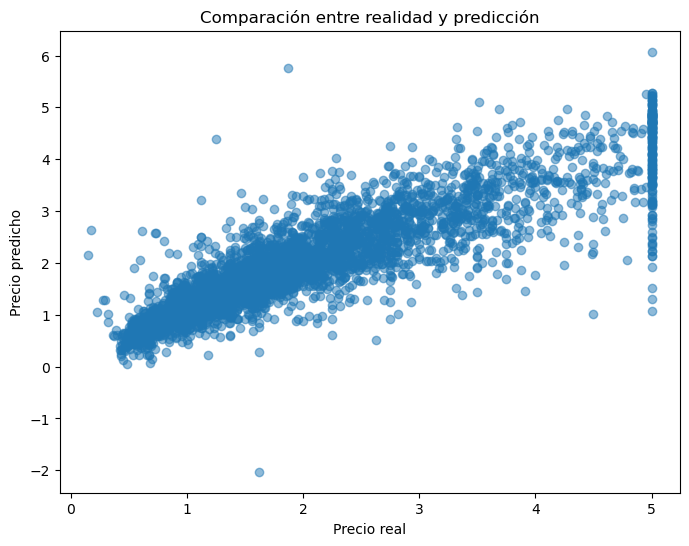

In [23]:
# Predict target values for test set
y_pred = model.predict(X_test_scaled).flatten()

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación entre realidad y predicción')
plt.show()